In [1]:
import numpy as np
import librosa, librosa.display #librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.
import matplotlib.pyplot as plt

In [2]:
FIG_SIZE = (15,10)

file = "audio\\blues.00000.wav"
#file = "audio\\good_morning.wav"
signal, sample_rate = librosa.load(file, sr=22050)

Text(0.5, 1.0, 'Waveform')

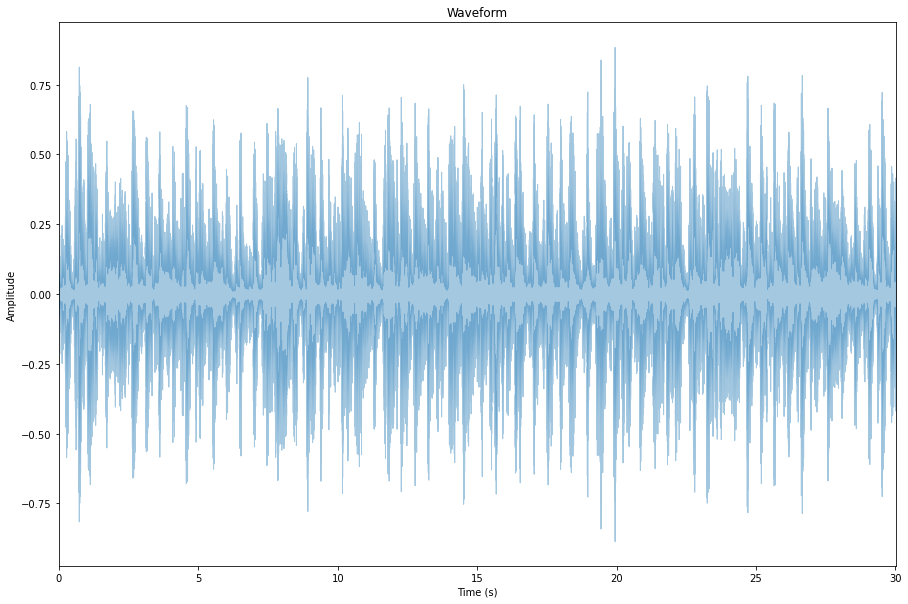

In [3]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [4]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

In [5]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power spectrum')

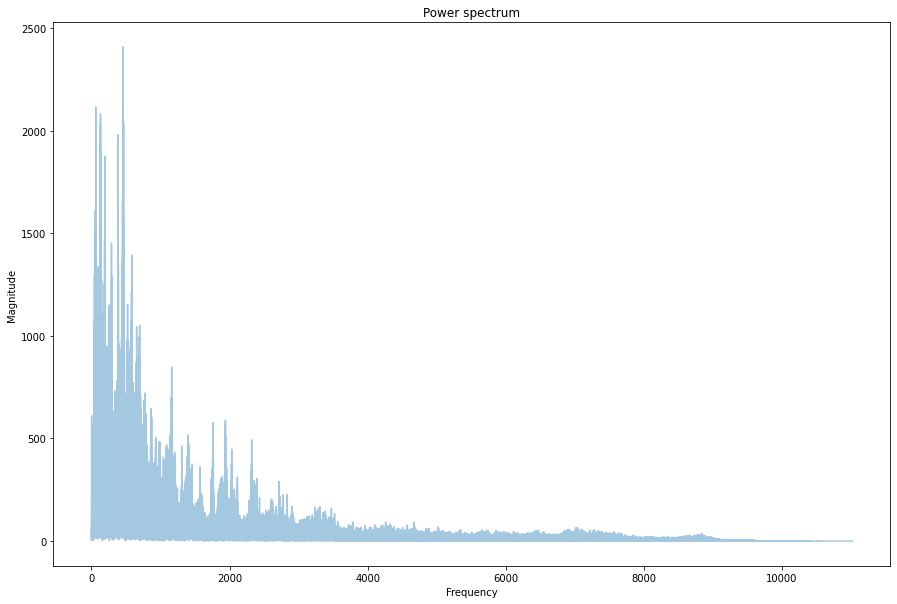

In [6]:
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [7]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
frame_length = 2*hop_length
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

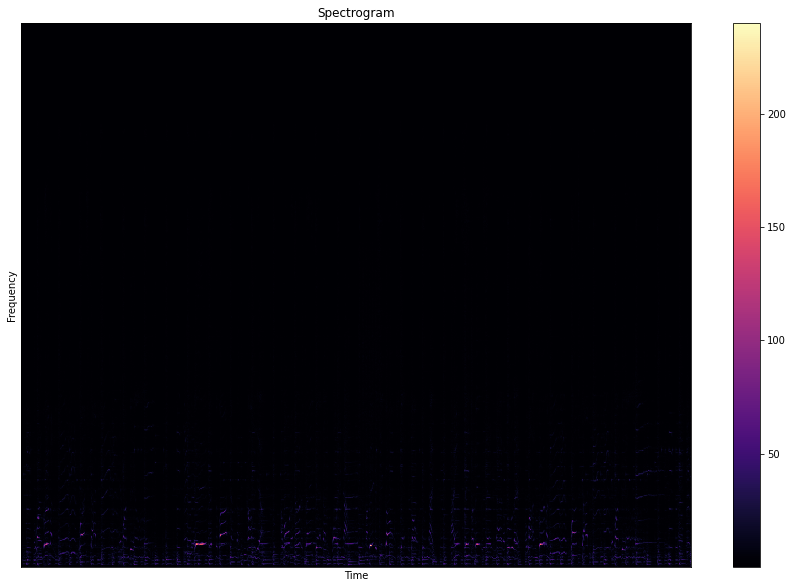

In [8]:
# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

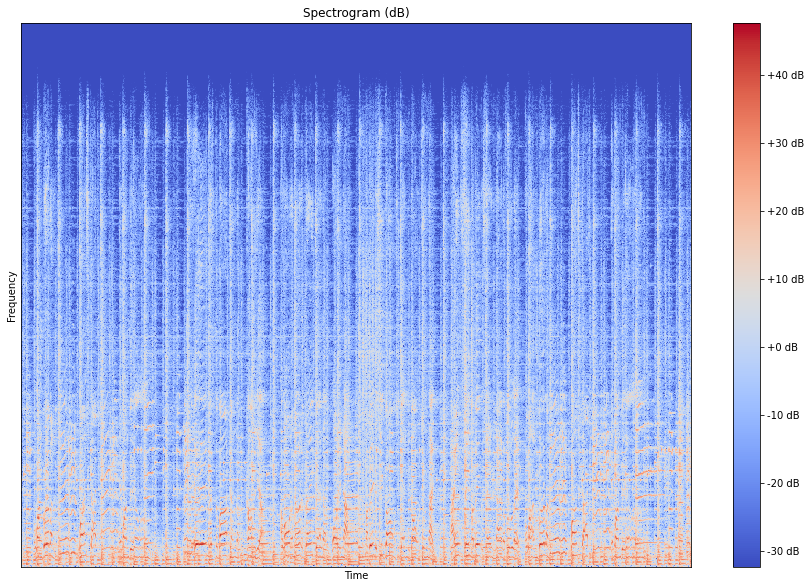

In [9]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

zero crossings 55031
total length 661794
zero crossing ragte:  (1, 1293)


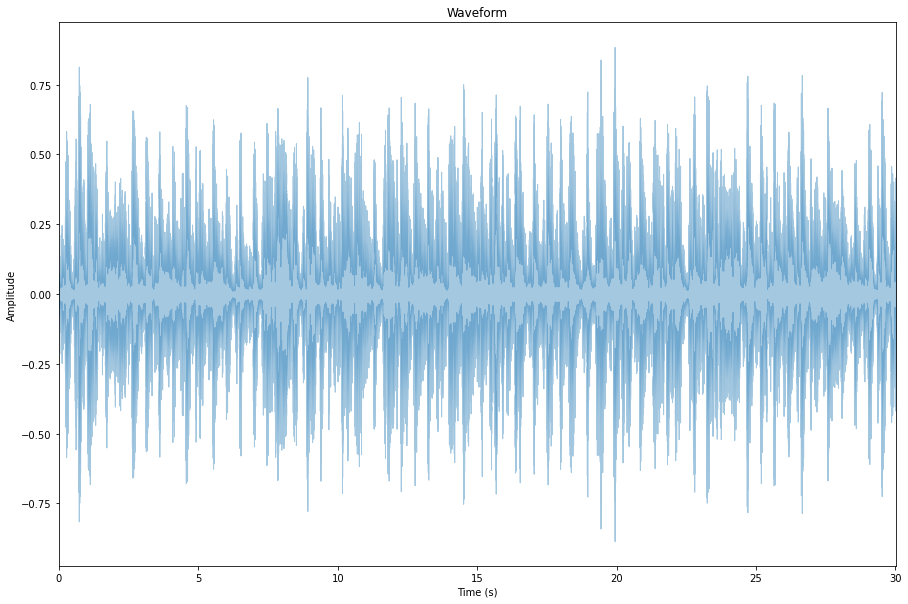

In [10]:
n1=0
n2=len(signal)

#ZC Calculation
zero_crossings = librosa.zero_crossings(signal[n1:n2], pad=False)
print("zero crossings",sum(zero_crossings))
print("total length",len(zero_crossings))

plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal[n1:n2], sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

#ZCR Calculation 
zcrs = librosa.feature.zero_crossing_rate(signal[n1:n2])
print("zero crossing ragte: ",zcrs.shape)

[0.06494141 0.08300781 0.10791016 ... 0.08642578 0.06933594 0.04589844]
[[0.06494141 0.08300781 0.10791016 ... 0.08642578 0.06933594 0.04589844]]


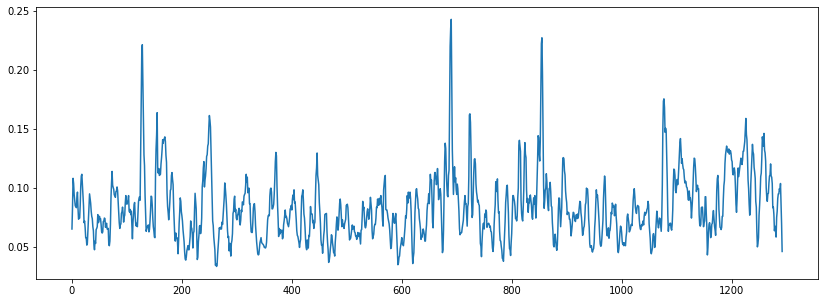

In [16]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])
print(zcrs[0])
print(zcrs)

zero crossings 55031
total length 661794
zero crossing ragte:  (1, 1293)


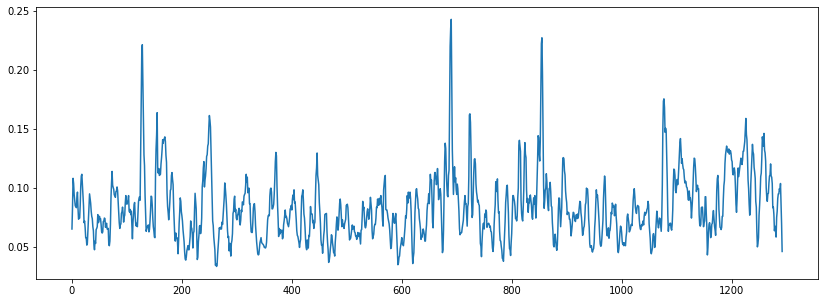

In [12]:
n1=0
n2=len(signal)

#ZC Calculation
zero_crossings = librosa.zero_crossings(signal[n1:n2], pad=False)
print("zero crossings",sum(zero_crossings))
print("total length",len(zero_crossings))

#ZCR Calculation 
zcrs = librosa.feature.zero_crossing_rate(signal[n1:n2])
print("zero crossing ragte: ",zcrs.shape)

plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

1293 13


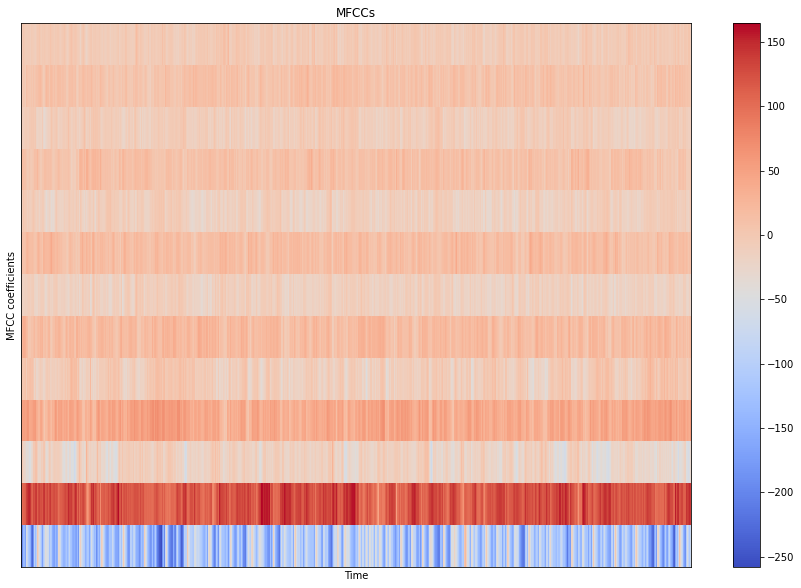

In [13]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
print(len(MFCCs[0]),len(MFCCs))
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [14]:
#Calculating Energy
energy = np.array([
    sum(abs(signal[i:i+frame_length]**2))
    for i in range(0, len(signal), hop_length)
])
print(energy)
print(len(energy))

[ 0.74559729  2.38825531  4.32594017 ... 20.18695397 21.99811254
  4.78909592]
1293


In [15]:
#Calculating Root Mean Square Energy
rmse = librosa.feature.rms(signal, frame_length=frame_length, hop_length=hop_length, center=True)
print(rmse.shape)
rmse = rmse[0]
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sample_rate, hop_length=hop_length)
print(t)

(1, 1293)
[0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]
